# K-Means Project

For this project, I will be using K-Means clustering to cluster universities into two clusters--private and public.

#### Data Dictionary

The data has 777 observations on the following 18 variables:
* Private - A factor with levels No and Yes indicating private or public university
* Apps - Number of applications received
* Accept - Number of applications accepted
* Enroll - Number of new students enrolled
* Top10perc - Pct. new students from top 10% of H.S. class
* Top25perc - Pct. new students from top 25% of H.S. class
* F.Undergrad - Number of fulltime undergraduates
* P.Undergrad - Number of parttime undergraduates
* Outstate - Out-of-state tuition
* Room.Board - Room and board costs
* Books - Estimated book costs
* Personal - Estimated personal spending
* PhD - Pct. of faculty with Ph.D.’s
* Terminal - Pct. of faculty with terminal degree
* S.F.Ratio - Student/faculty ratio
* perc.alumni - Pct. alumni who donate
* Expend - Instructional expenditure per student
* Grad.Rate - Graduation rate

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

### Get Data

In [2]:
#read in the data to dataframe
df = pd.read_csv('/Users/vannatrieu/Downloads/College_Data')

#check first 5 records
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Get Info

In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


In [4]:
#describe
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Exploratory Data Analysis

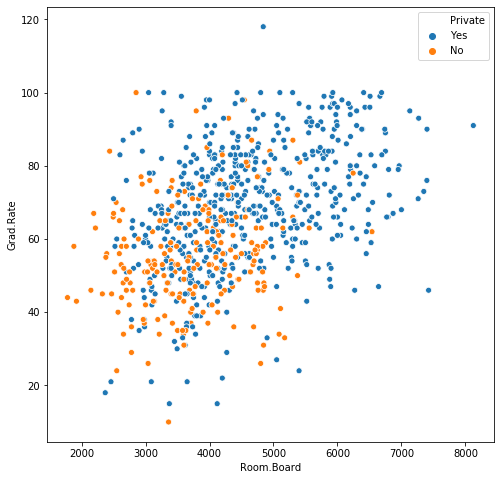

In [5]:
#scatterplot of Grad.Rate vs Room.Board, hued by Private
plt.figure(figsize=(8,8))
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private')

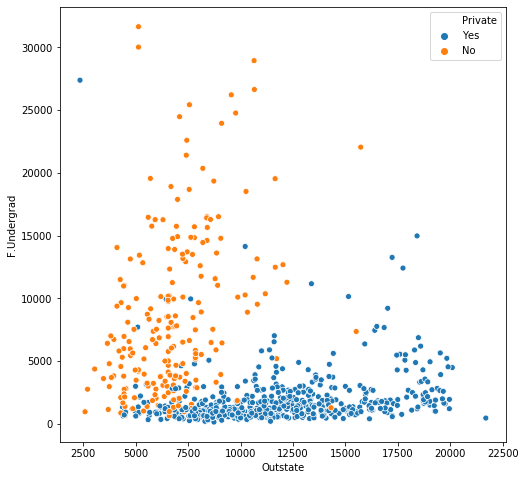

In [6]:
#scatterplot of F.Undergrad vs Outstate, hued by Private
plt.figure(figsize=(8,8))
sns.scatterplot(x='Outstate', y='F.Undergrad', data=df, hue='Private')

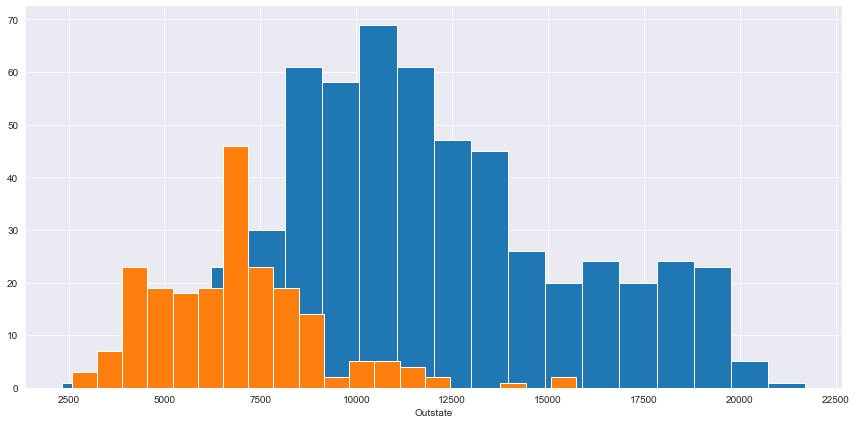

In [7]:
#stacked histogram showing Out of State Tuition based on Private
sns.set_style('darkgrid')
histo = sns.FacetGrid(data=df, hue='Private', height=6, aspect=2)
histo = histo.map(plt.hist, 'Outstate', bins=20)

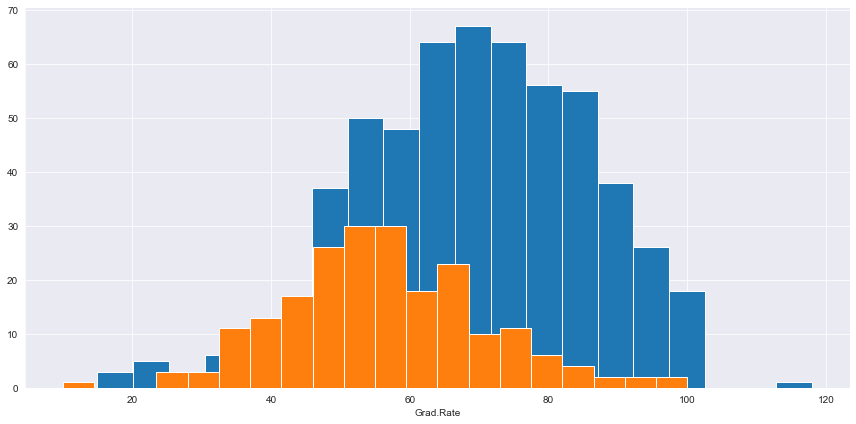

In [8]:
#stacked histogram showing Graduation Rate based on Private
sns.set_style('darkgrid')
histo = sns.FacetGrid(data=df, hue='Private', height=6, aspect=2)
histo = histo.map(plt.hist, 'Grad.Rate', bins=20)

There is a school with a graduation rate greater than 100%, which is strange.

In [9]:
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Let's set this schools graduation rate to 100% instead.

In [20]:
df.at[95, 'Grad.Rate'] = 100

#based on the results, for row 95, or Cazenovia College, the graduation rate is now 100%
df[df['Unnamed: 0'] == 'Cazenovia College']['Grad.Rate']

95    100
Name: Grad.Rate, dtype: int64

### K Means Clustering

In [11]:
#import KMeans
from sklearn.cluster import KMeans

This K Means model will have 2 clusters. 

In [12]:
#instantiating a KMeans object
km = KMeans(n_clusters=2)

In [24]:
#fitting the model to all the data
km.fit(df[['Outstate','Personal']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Get the cluster center vectors, i.e. the centroid coordinates for each cluster.

In [25]:
km.cluster_centers_

array([[14808.68085106,  1117.53900709],
       [ 7952.22626263,  1467.74343434]])

### Visualizing the Clusters

Let's see how our K Means model clustered the data.

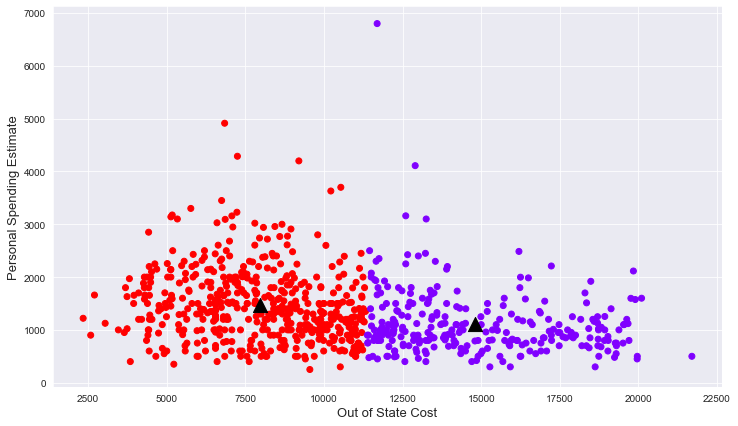

In [28]:
plt.figure(figsize=(12,7))
plt.xlabel('Out of State Cost', fontsize=13)
plt.ylabel('Personal Spending Estimate', fontsize=13)

#plot the features; notice where the K Means model's labels are used to distinguish between clusters
plt.scatter(x=df['Outstate'], y=df['Personal'], c=km.labels_, cmap='rainbow')
#plot the centroids, which are the triangles
centers = np.array(km.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="^", s=200, color='black')

### Actuals

The scatterplot below shows how the data is actually clustered with regard to Private vs Public universities. 

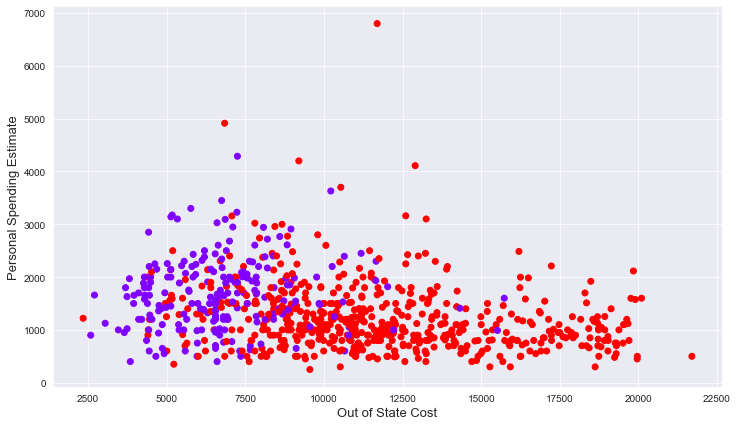

In [29]:
df['Private_num'] = df['Private'].apply(lambda x: 0 if x=='No' else 1)

plt.figure(figsize=(12,7))
plt.xlabel('Out of State Cost', fontsize=13)
plt.ylabel('Personal Spending Estimate', fontsize=13)
plt.scatter(x=df['Outstate'], y=df['Personal'], c=df['Private_num'], cmap='rainbow')